#### <a id='top'></a>

# Homework 2: Data Visualization and Probability Analysis 
***

**Name**: Sarah Litz

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 14**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a id='p1'></a>

## (15 points) Problem 1: Theory (Median Distance)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?

**Typeset your proof for Problem 1 in this cell or cells.**

$$f'(c) = \frac{df}{dc} \sum_{i=1}^n \lvert X_i - c\rvert 
= \sum_{i=1}^n \frac{X_i - c}{\lvert X_i - c\rvert} $$

$$let f'(c) = 0$$

$$ 0 = \sum_{i=1}^n \frac{X_i - c}{\lvert X_i - c\rvert} $$
$$ 0 = \sum_{i=1}^n ( \frac{X_i}{\lvert X_i - c\rvert} - \frac{c}{\lvert X_i - c\rvert} )$$
$$ (n*c)\sum_{i=1}^n \frac{1}{\lvert X_i - c\rvert} =\sum_{i=1}^n \frac{X_i}{\lvert X_i - c\rvert}$$
$$ n*c = \sum_{i=1}^n X_i $$
$$ c = \frac{1}{n}\sum_{i=1}^n X_i $$




[Back to top](#top)
<a id='p2'></a>

## (40 pts) Problem 2: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


**Typeset your result for Problem 2A in this cell.**

The mean of a data set with $n$ observations requires a total of $n$ operations; $n-1$ operations to find the sum of all the elements, plus $1$ operations to divide the total by n. 

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

**Typeset your result for Problem 2B in this cell.**

The mean of a streaming data set with $n$ observations requires a total of $4n$ operations. More specifically, for each individual element added in, 4 operations are required: 1 to use the current mean value to return to the previous sum, 1 to increment the iterator variable, 1 to sum the new element with the old sum, and 1 to divide the sum by the iterator variable. 

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after problem 3, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [2]:
#Your code here
def my_sample_mean(array):
    #input num array, return mean of array 
    #equation1: sum and divide by arrayLen
    sum = 0
    for i in array: 
        sum = sum + i 
    mean = sum/len(array)
    return mean

def my_sample_var(array): 
    #calc mean
    mean = my_sample_mean(array)
    #calc sum of squared difference from mean
    var = 0
    for i in array:
        var = var + ((i - mean)**2)
    #divide by (arrLength-1) and return
    var = var/(len(array)-1)
    return var
    
    

**Part D**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]`

In [3]:
#Your code here
arrBus = np.array([312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42])

print("Mean: ", my_sample_mean(arrBus))
print("Variance: ", my_sample_var(arrBus))

Mean:  56.416666666666664
Variance:  7274.628787878787


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

In [4]:
# Given API:
def update_mean(prev_mean, xn, n):
    #Your code here to compute updates
    #xn = current variable, n = current index, prev_mean = mean of vals discluding element n
    now_mean = prev_mean + (xn-prev_mean)/n
    return now_mean
    
#Your code here (to loop over the full data)
print("element      mean")
meanPrev = 0 
idx = 1 #index tracker
buffbus_bad_means = np.array([312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42])
for xn in buffbus_bad_means: 
    meanPrev = update_mean(meanPrev, xn, idx)
    print("  ",idx, "      ", meanPrev)
    idx = idx + 1

element      mean
   1        312.0
   2        158.0
   3        108.66666666666666
   4        81.5
   5        69.6
   6        64.5
   7        66.85714285714286
   8        60.875
   9        55.0
   10        55.5
   11        57.72727272727273
   12        56.416666666666664


**You may report any results for part E here, if not done using print() statements**

To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [5]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in **part E**?  Is this truly better than the uninformed approach from **part B**?

**Typeset your analysis to part F in this cell or cells**

The number of operations for part E came out to be the same as in part B. In the update_mean function there were only 3 operations, however in the for loop over the full data the index incrementor makes each mean update require a total of 4 operations. 

[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [6]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath) #load the data into a DataFrame
df.head() #displays the start of the data frame (first 5 displayed below, can also specify a num w/in the parentheses 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [7]:
#Your Code here
    #len(df.index)) #displays total number of rows

#probability = event/outcomes = survived/totalPassengers
dfSurvived = df.loc[df["Survived"] == True].copy()
probability = len(dfSurvived.index)/len(df.index)
print(probability)

0.39281705948372614


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Typeset your responses here**

Class Warfare: If this claim proves to be true, then the data should show that amongst class 1 ticket holders only, the probability of survival is higher than that of class 2 ticket holders, and P(survival) for class 2 is higher than class 3. 

Male chivalry: If this claim proves to be true, then the data should show that Probability(survival) if the passenger is Male is lower than the Probability(survival) if the passenger is female.

These two hypotheses are not mutually exclusive, because both of these factors could have played a role at the same time. 

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [8]:
#Your Code here
print("       Unclean Data Info:")
df.info()
#Category w/ null objects: Age 
#drop all rows that contain 'null' in the age category
print()
print("       Clean Data Info:")
dfTitanic = df.dropna(subset=["Age"]).copy()
dfTitanic.info()



       Unclean Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

       Clean Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 888
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          71

**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [9]:
#Your Code here
    #len(dfTitanic) for total elements 
    

dfSurvived = df.loc[df["Survived"] == True].copy() #All Passengers that Survived
        #print(len(dfSurvived))
        #print(137+90+123)
def probabilitySurvival(dataFrame): 
    return len(dataFrame.index)/len(dfSurvived.index)

#probability of survival according to class  
dfClass1 = dfSurvived.loc[dfSurvived["Pclass"] == 1].copy()
print("Class 1: ", len(dfClass1))
print("  P(survival) =", probabilitySurvival(dfClass1))

dfClass2 = dfSurvived.loc[dfSurvived["Pclass"] == 2].copy()
print("Class 2: ", len(dfClass2))
print("  P(survival) =", probabilitySurvival(dfClass2))

dfClass3 = dfSurvived.loc[dfSurvived["Pclass"] == 3].copy()
print("Class 3: ", len(dfClass3))
print("  P(survival) =", probabilitySurvival(dfClass3))

print() #skips line

#probability of survival according to gender
dfMale = dfSurvived.loc[dfSurvived["Sex"] == "male"].copy()
print("Male: ", len(dfMale))
print("  P(survival) =", probabilitySurvival(dfMale))

dfFemale = dfSurvived.loc[dfSurvived["Sex"] == "female"].copy()
print("Female: ", len(dfFemale))
print("  P(survival) =", probabilitySurvival(dfFemale))

print() #skips line

#probability of survival according to combo of two variables
dfFemale1 = dfFemale.loc[dfFemale["Pclass"] == 1].copy()
dfFemale2 = dfFemale.loc[dfFemale["Pclass"] == 2].copy()
dfFemale3 = dfFemale.loc[dfFemale["Pclass"] == 3].copy()
print("Class 1 and Female: ", len(dfFemale1.index))
print("  P(survival) =", probabilitySurvival(dfFemale1))
print("Class 2 and Female: ", len(dfFemale2.index))
print("  P(survival) =", probabilitySurvival(dfFemale2))
print("Class 3 and Female: ", len(dfFemale3.index))
print("  P(survival) =", probabilitySurvival(dfFemale3))

dfMale1 = dfMale.loc[dfMale["Pclass"] == 1].copy()
dfMale2 = dfMale.loc[dfMale["Pclass"] == 2].copy()
dfMale3 = dfMale.loc[dfMale["Pclass"] == 3].copy()
print("Class 1 and Male: ", len(dfMale1.index))
print("  P(survival) =", probabilitySurvival(dfMale1))
print("Class 2 and Male: ", len(dfMale2.index))
print("  P(survival) =", probabilitySurvival(dfMale2))
print("Class 3 and Male: ", len(dfMale3.index))
print("  P(survival) =", probabilitySurvival(dfMale3))


Class 1:  137
  P(survival) = 0.3914285714285714
Class 2:  90
  P(survival) = 0.2571428571428571
Class 3:  123
  P(survival) = 0.3514285714285714

Male:  114
  P(survival) = 0.32571428571428573
Female:  236
  P(survival) = 0.6742857142857143

Class 1 and Female:  91
  P(survival) = 0.26
Class 2 and Female:  71
  P(survival) = 0.20285714285714285
Class 3 and Female:  74
  P(survival) = 0.21142857142857144
Class 1 and Male:  46
  P(survival) = 0.13142857142857142
Class 2 and Male:  19
  P(survival) = 0.054285714285714284
Class 3 and Male:  49
  P(survival) = 0.14


**Typeset your responses here**

Base p(survival) = 0.39281705948372614

(i) When reviewing class survival probability, how do the results compare to the base survival probability results from Part A?
    Class 1 closely alligns with the base probability, but class 2 and class 3 have a lower probability of survival. 

(ii) When reviewing gender survival probability, how do the results compare to the base survival probability results from Part A?
    The probability of a woman surviving is almost double that of the base survival probability, where as the probability of male survival is slightly less than the base survival probability. 
    
(iii) Within each passenger class, were men or women more/less/equally likely to survive?
    Class 1: females more likely to survive. 
    Class 2: females more likely to survive.
    Class 3: females more likely to survive.
    
(iv) Did men in first class or women in third class have a higher survival probability?
    Females in third class have a higher survival probability.



**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

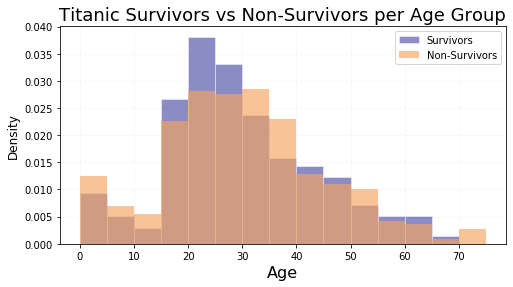

In [10]:
my_bins = range(0,80,5) #width 5, in the range 0 to 80 
#Your Code here
#Plot: density histogram = distribution of ages among survivers 
                        #and, distribution of of ages among non-survivers. 

dfSurvived = df.loc[df["Survived"] == True].copy() #All Passengers that Survived
dfNotSurvived = df.loc[df["Survived"] == False].copy() #all passengers that did not survive. 

#initialize figure
fig, ax = plt.subplots(figsize=(8,4)) 
#plot histogram
dfSurvived.hist(column="Age", density=True, ax=ax, bins=my_bins, facecolor="navy", edgecolor="white", alpha=0.45) #python requires the "ax=","bins=", etc. for passing in these args. 
    #pass ax aka the figure axis to the function so that we can make modifications to the layout later one 
        #to define your own bins you can do so by passing in an optional bins argument to hist()
            #the two options are to pass in an integer value for the number of bins you want or a list specifying the bin edges.
dfNotSurvived.hist(column="Age", density=True, ax=ax, bins=my_bins, facecolor="sandybrown",alpha=0.65)

#Title
ax.set_title("Titanic Survivors vs Non-Survivors per Age Group", fontsize=18)

#Axis Labels
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Density", fontsize=12)

#make grid lighter
ax.grid(alpha=0.1)
ax.set_axisbelow(True)

#add legend
ax.legend(["Survivors", "Non-Survivors"]);

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Typeset your responses here** 
It would be misleading to plot this data as a frequency histogram rather than a density histogram because it does not take into consideration how many passengers of that age group were on the ship, it only display the raw numbers. So, for example, if a certain age group contains the majority of the population on the Titanic, then the frequency of the survivors (and non-survivors) for this group will likely be higher than other groups, even though it may have been a group that was not prioritized when choosing who to send onto the lifeboats. 

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**Typeset your responses here**
The data suggests a combination of these characteristics, however the one that seems to display having the greatest impact is male chivalry. The probability of survival was significantly higher for women over men, even when the characteristic of class warfare was added in. 

**P.S.** It is not a component of your graded assignment, but the 1997 James Cameron film _Titanic_ captured some of these very notions in some riveting cinema. Whether or not you found evidence for these cases in the data, you might find it interesting to watch the movie (or just the segments of the sinking) to see one interpretation of these ideas. You can perhaps see how we might be persuaded to reinterpret the evidence of data by a heart-wrenching performance from a handsome young Leonardo DiCaprio!

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}

